### Analyzing Medical examination data


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


**1. Adding an **OVERWEIGHT** column to the data. (0 = NOT, 1 = overweight)** <br>
    *1. calculating BMI* <br>
    *2. BMI > 25 ==> overweight*

In [7]:
bmi = (df['weight'] / (df['height'] / 100) ** 2).round(1)
df['overweight'] = np.where(bmi > 25, 1, 0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


**2. Normalizing data --> 0 = normal , 1 = abnormal** <br>
*If the value of cholesterol or gluc is 1, setting the value to 0. If the value is more than 1, setting the value to 1.*

In [17]:
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)


**3. Creating dataframe for cat plot** <br>
<br>
* Creating variable column with values from cholesterol, gluc, smoke, alco, active and overweight

In [9]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


* Splitting data by cardio and displaying counts

In [10]:
df_cat = pd.DataFrame(df_cat.groupby(['cardio', 'variable', 'value'])['value'].count()).rename(columns={'value': 'total'}).reset_index()
df_cat


,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,16015
9,0,overweight,1,19006


* Converting the data into long format 


In [20]:
df_cat_long = df_cat.set_index(['cardio', 'variable', 'value'])['total'].unstack(level='value').fillna(0).reset_index()


In [28]:
df_cat_melted = pd.melt(df_cat_long, id_vars=['cardio', 'variable'], value_vars=[0, 1], var_name='value_type', value_name='total')
df_cat_melted

,cardio,variable,value_type,total
0,0,active,0,6378
1,0,alco,0,33080
2,0,cholesterol,0,29330
3,0,gluc,0,30894
4,0,overweight,0,16015
5,0,smoke,0,31781
6,1,active,0,7361
7,1,alco,0,33156
8,1,cholesterol,0,23055
9,1,gluc,0,28585


* Creating chart showing the value counts of the categorical features for both CARDIO values (0, 1)

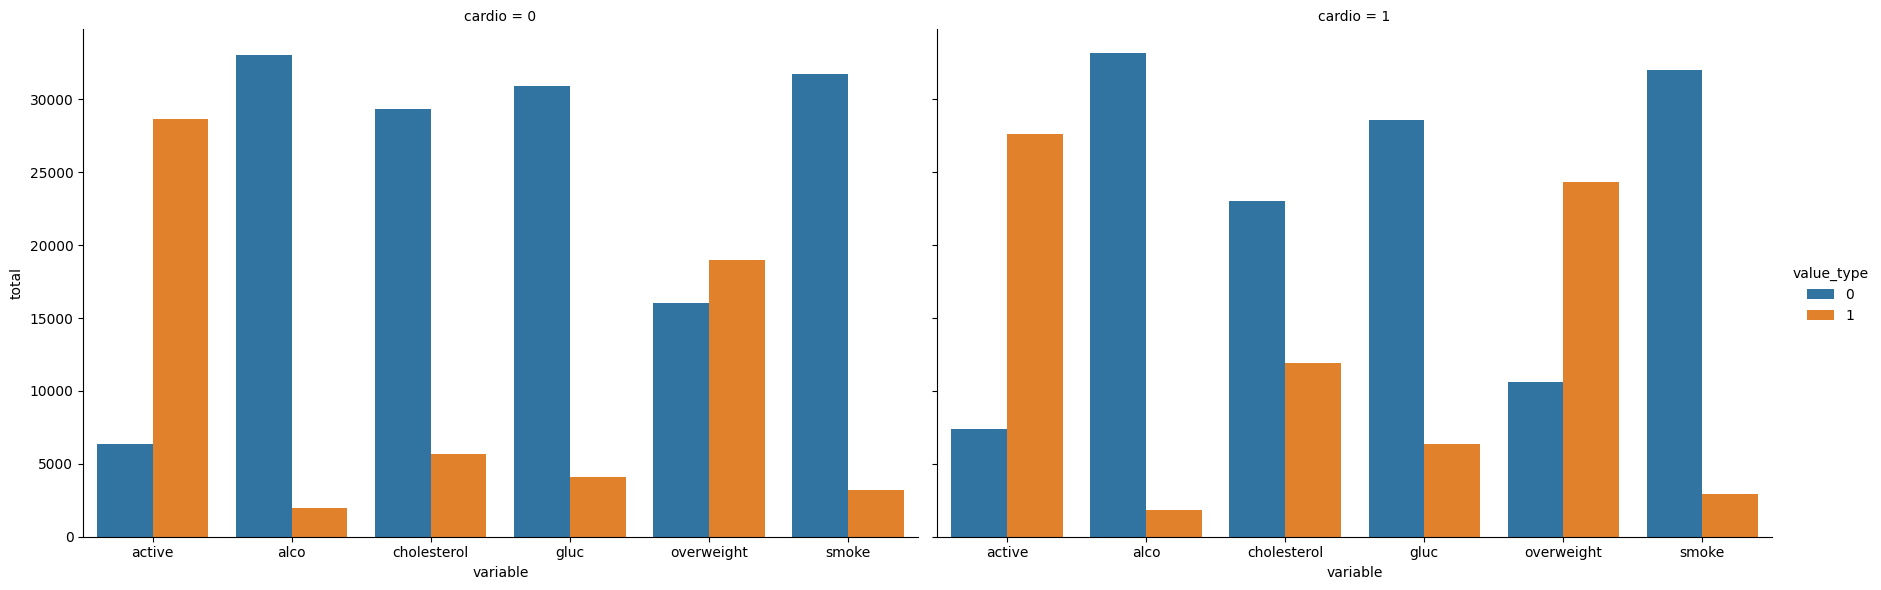

In [14]:

sns.catplot(x='variable', y='total', hue='value_type', col='cardio', data=df_cat_melted, kind='bar', height=6, aspect=1.5)

plt.show()

**4. Cleaning the data for heatmap**


* **Excluding:** <br>
1. diastolic pressure is higher than systolic 
2. height is less than the 2.5th percentile 
3. height is more than the 97.5th percentile
4. weight is less than the 2.5th percentile
5. weight is more than the 97.5th percentile

In [21]:
df_heat = df[df['ap_lo'] <= df['ap_hi']]
df_heat = df[df['height'] >= df['height'].quantile(0.025)]
df_heat = df[df['height'] <= df['height'].quantile(0.975)]
df_heat = df[df['weight'] >= df['weight'].quantile(0.025)]
df_heat = df[df['weight'] <= df['weight'].quantile(0.975)]


* Calculating the correlation matrix

In [25]:
corr = round(df_heat.corr(), 2)
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
age,0.0,1.00,-0.02,-0.08,0.07,0.02,0.02,-0.13,-0.09,-0.05,-0.03,-0.01,0.24,0.09
sex,0.0,-0.02,1.00,0.49,0.17,0.01,0.01,0.04,0.02,0.34,0.17,0.01,0.01,-0.05
height,-0.0,-0.08,0.49,1.00,0.30,0.00,0.01,0.06,0.03,0.19,0.09,-0.01,-0.02,-0.13
weight,-0.0,0.07,0.17,0.30,1.00,0.03,0.04,-0.13,-0.10,0.07,0.07,-0.02,0.18,0.65
ap_hi,0.0,0.02,0.01,0.00,0.03,1.00,0.02,-0.02,-0.01,-0.00,0.00,0.00,0.05,0.02
ap_lo,-0.0,0.02,0.01,0.01,0.04,0.02,1.00,-0.03,-0.01,0.00,0.01,0.00,0.06,0.03
cholesterol,-0.0,-0.13,0.04,0.06,-0.13,-0.02,-0.03,1.00,0.38,-0.01,-0.04,-0.01,-0.20,-0.13
gluc,-0.0,-0.09,0.02,0.03,-0.10,-0.01,-0.01,0.38,1.00,0.00,-0.02,0.01,-0.09,-0.09
smoke,-0.0,-0.05,0.34,0.19,0.07,-0.00,0.00,-0.01,0.00,1.00,0.34,0.03,-0.02,-0.01


* Generating a mask for the upper triangle

In [27]:
mask = np.triu(np.ones_like(corr, dtype=bool)) 


* Creating a heat map showing correlations between categorical features

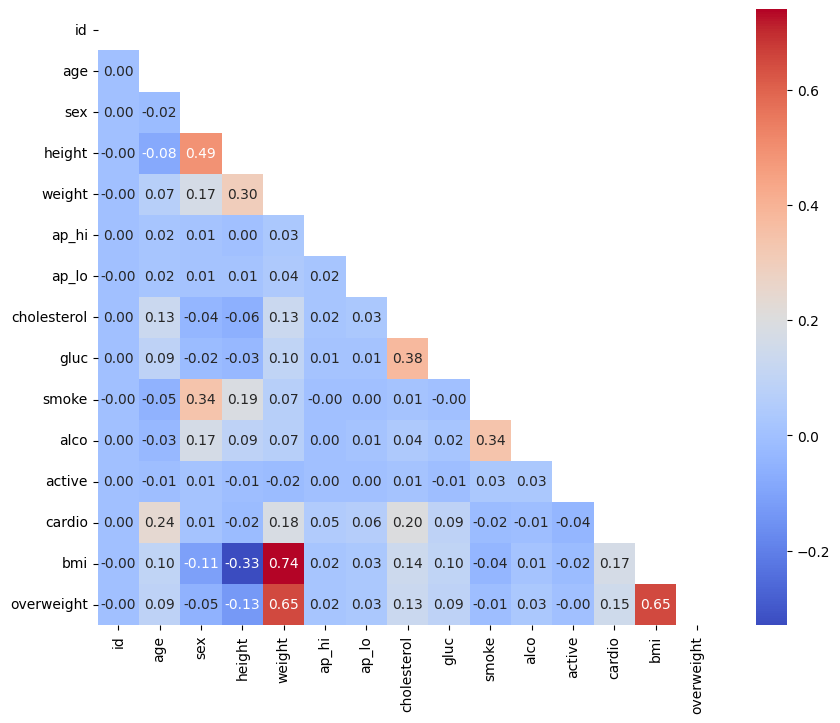

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

#### Conclusions 
1. **The most visible differences between patients with/without cardiac problems is in their cholesterol, overweight and glucose score.** <br>
* When comparing patients cholesterol levels, more people who have a problem with cholesterol levels also have cardiac issues.  Looking at people without cardiac problems, there is a significant difference in amount of people with and without cholesterol problems, where those without cholesterol problems are the majority. Comparing these result with patients with cardiac problems, there is a visible smaller difference in amount of people with and without problems with cholesterol levels. 
With cardiac problems higher percentage of people are overweight. Interesting finding may be, that according to chart displaying patients with no cardiac problems, there are approximately the same amount of overweight people and people with normal weight. <br>
2. **There is higher positive correlation between Glucose and Cholesterol levels as well as Smoking and Alcohol intake.**
* Higher positive correlation (0.4) between cholesterol and glucose suggests that individuals with higher cholesterol levels may also suffer from higher glucose levels, which can indicate metabolic disorders.<br>
* Higher positive correlation (0.3) between smoking and alcohol intake imply, that people who smoke are likely to drink alcohol.<br>
* Mediate positive correlation (0.2) between cardiological problems and age was expected due to facts, that risks of cardiovascular disease generally increases with age.<br>
* Mediate positive correlation (0.2) between cardiovascular diseases and cholesterol suggests higher risk of CV problems with higher cholesterol levels as was also visible on the previous categorical plot.<br>
* Lower positive correlation (0.1) is visible between overweight and cardiovascular diseases which, acording to previous chart, may have been suggested to be much higher.  <br>
* Many other correlations are relatively weak (close to 0). This suggests that these variables don't have a strong linear relationship with each other.